## Model Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet50_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.351, ECE: 0.046
Optimal temperature: 4.908
After temperature - NLL: 0.827, ECE: 0.423


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5885 ± 0.0052
Final Average Prediction Set Size: 1.76 ± 0.04
Final Average Coverage: 0.9469 ± 0.0043
Final Average Real Probability: 0.9216 ± 0.0047


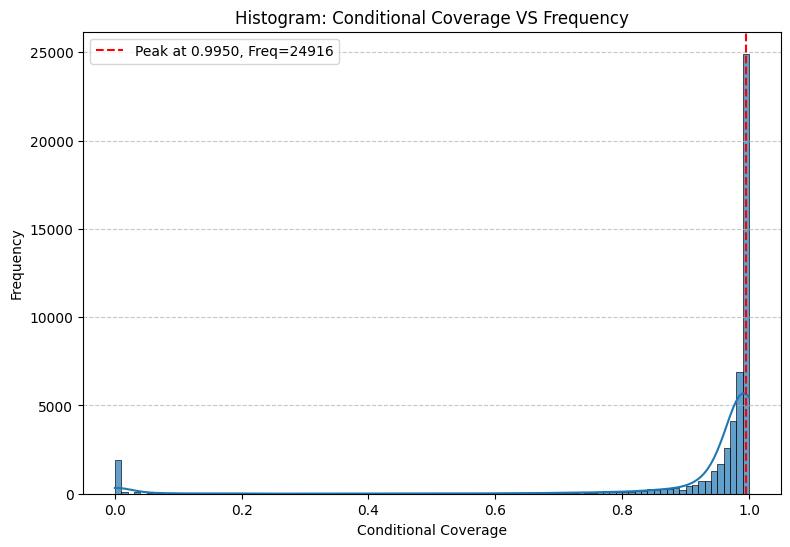

24916 (49.83%) samples reached the peak conditional coverage at 0.9950


In [4]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5885 ± 0.0052
Final Average Prediction Set Size: 1.76 ± 0.04
Final Average Coverage: 0.9469 ± 0.0043
Final Average Real Probability: 0.9216 ± 0.0047


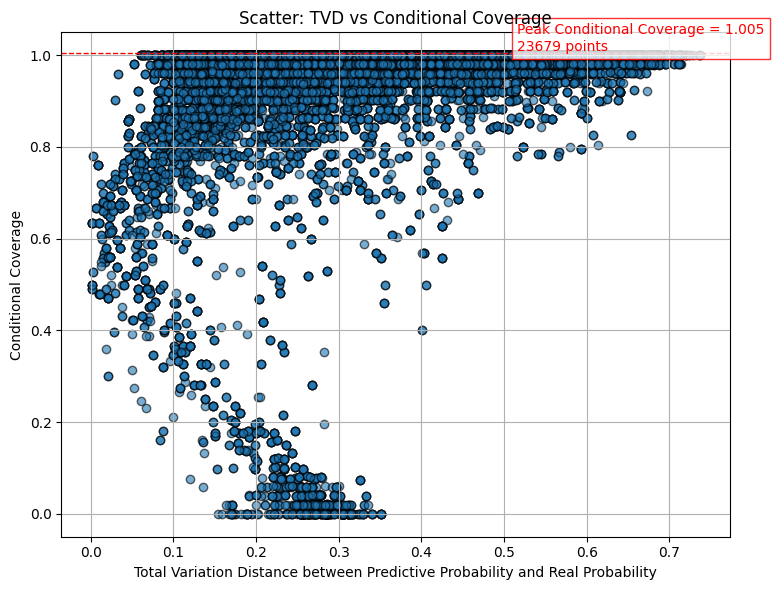

Peak Conditional Coverage = 1.005, with 23679 samples

=== Count Regions Summary ===
40276 (80.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
3078 (6.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2289 (4.6%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64958']
  Real Probability Set      : ['0.84000']
Sample 2:
  Predictive Probability Set: ['0.68170']
  Real Probability Set      : ['0.86275']
Sample 3:
  Predictive Probability Set: ['0.70056']
  Real Probability Set      : ['0.88235']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.60389']
  Real Probability Set      : ['0.08163']
Sample 2:
  Predictive Probability Set: ['0.25196', '0.22876', '0.11416']
  Real Probability Set      : ['0.01887', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.25196', '0.22876', '0.11416']
  Real Probability Se

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6011 ± 0.0054
Final Average Prediction Set Size: 1.59 ± 0.03
Final Average Coverage: 0.9474 ± 0.0043
Final Average Real Probability: 0.9212 ± 0.0045


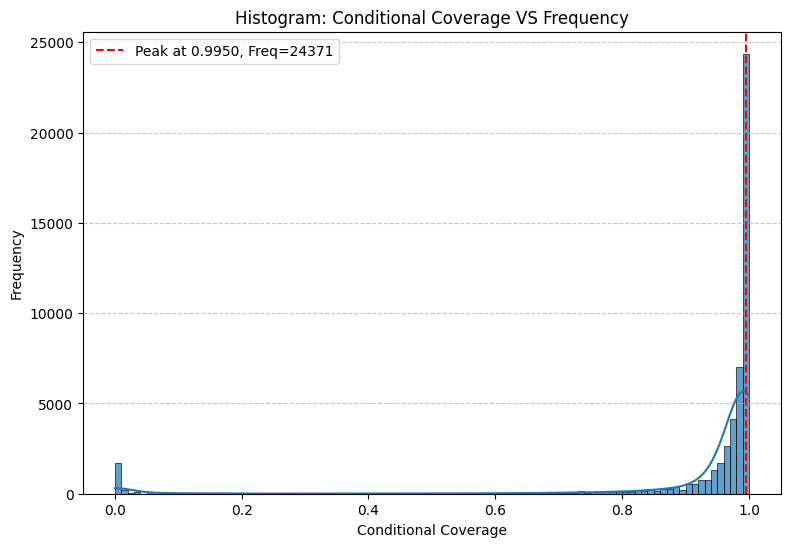

24371 (48.74%) samples reached the peak conditional coverage at 0.9950


In [6]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6011 ± 0.0054
Final Average Prediction Set Size: 1.59 ± 0.03
Final Average Coverage: 0.9474 ± 0.0043
Final Average Real Probability: 0.9212 ± 0.0045


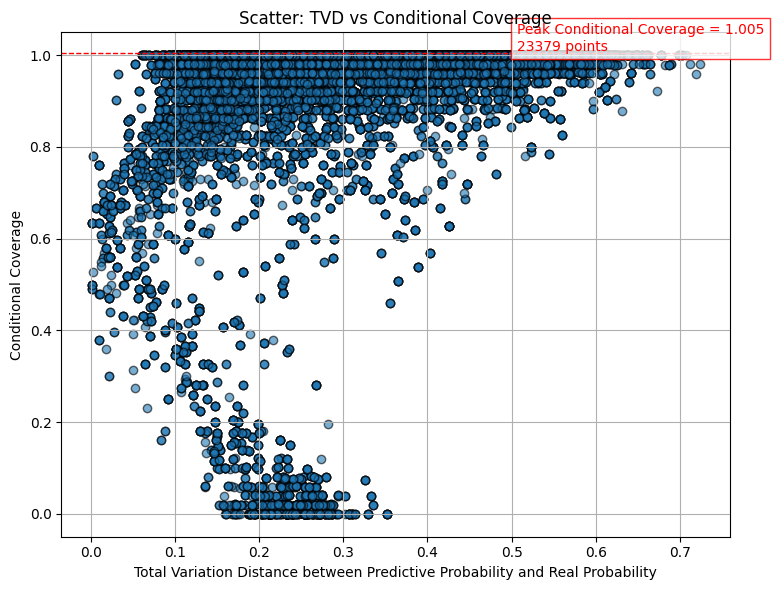

Peak Conditional Coverage = 1.005, with 23379 samples

=== Count Regions Summary ===
41727 (83.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1978 (4.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2692 (5.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.69429']
  Real Probability Set      : ['0.84906']
Sample 2:
  Predictive Probability Set: ['0.80448']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.76790']
  Real Probability Set      : ['0.85714']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56893']
  Real Probability Set      : ['0.05882']
Sample 2:
  Predictive Probability Set: ['0.37054', '0.17722']
  Real Probability Set      : ['0.10204', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.38290', '0.17943']
  Real Probability Set      : ['0.02000', '0.00000']



In [5]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.3458 ± 0.1129
Final Average Prediction Set Size: 1.41 ± 0.06
Final Average Coverage: 0.9494 ± 0.0043
Final Average Real Probability: 0.9219 ± 0.0048


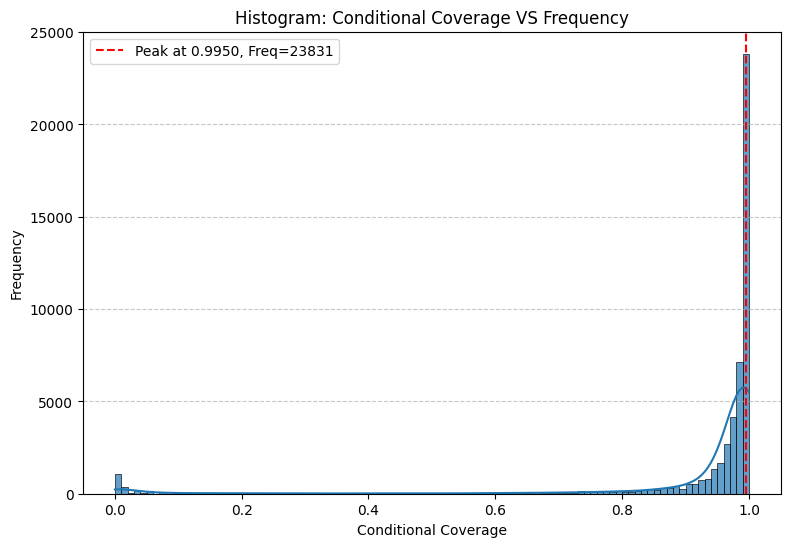

23831 (47.66%) samples reached the peak conditional coverage at 0.9950


In [8]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.3458 ± 0.1129
Final Average Prediction Set Size: 1.41 ± 0.06
Final Average Coverage: 0.9494 ± 0.0043
Final Average Real Probability: 0.9219 ± 0.0048


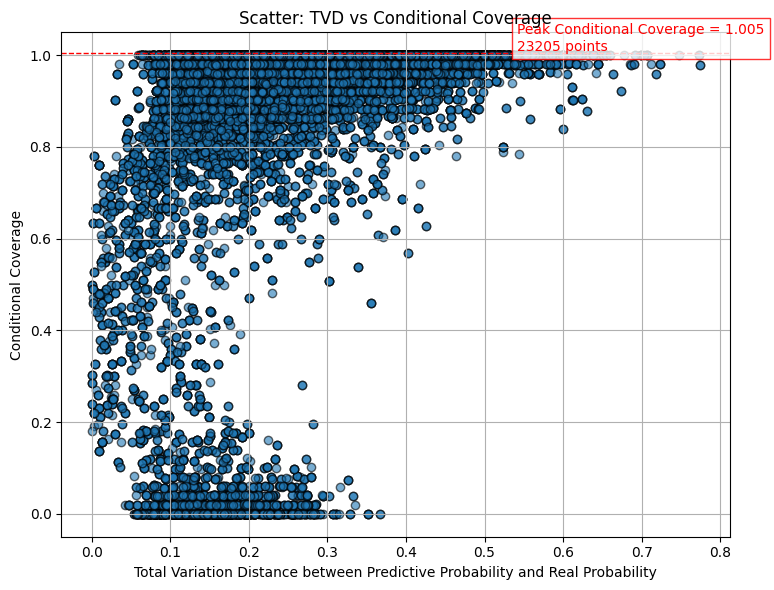

Peak Conditional Coverage = 1.005, with 23205 samples

=== Count Regions Summary ===
43617 (87.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
559 (1.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4219 (8.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79656']
  Real Probability Set      : ['0.98077']
Sample 2:
  Predictive Probability Set: ['0.63764']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.81517']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.41510']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.52567']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.43105', '0.12593']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TV

In [7]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05)